# Central question: does a patients  time in the hospital dealing with diabetes treatment  vary between different gender and racial groups?

In [1]:
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import numpy

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.shape # i wanted to figure out how large the entire dataset was #

(101766, 50)

In [7]:
df.columns
#this was used to see what different measures i could use to formulate a question. I decided to analyze length of stay in the hospital by gender an ethnic group/race

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [8]:
# I wanted to check if there were any missing values the would need to change in the dataframe
nan_df = df.isna()
print(nan_df)

        encounter_id  patient_nbr   race  gender    age  weight  \
0              False        False  False   False  False   False   
1              False        False  False   False  False   False   
2              False        False  False   False  False   False   
3              False        False  False   False  False   False   
4              False        False  False   False  False   False   
...              ...          ...    ...     ...    ...     ...   
101761         False        False  False   False  False   False   
101762         False        False  False   False  False   False   
101763         False        False  False   False  False   False   
101764         False        False  False   False  False   False   
101765         False        False  False   False  False   False   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                   False                     False                False   
1                   False                  

In [9]:
count_questions= df[df ['weight']=='?'].count()
count_questions
# Looking back  at the preview of the dataset with the .head function i saw these "?" values. So i wanted to see how many of these values wwere in the dataframe

encounter_id                98569
patient_nbr                 98569
race                        98569
gender                      98569
age                         98569
weight                      98569
admission_type_id           98569
discharge_disposition_id    98569
admission_source_id         98569
time_in_hospital            98569
payer_code                  98569
medical_specialty           98569
num_lab_procedures          98569
num_procedures              98569
num_medications             98569
number_outpatient           98569
number_emergency            98569
number_inpatient            98569
diag_1                      98569
diag_2                      98569
diag_3                      98569
number_diagnoses            98569
max_glu_serum               98569
A1Cresult                   98569
metformin                   98569
repaglinide                 98569
nateglinide                 98569
chlorpropamide              98569
glimepiride                 98569
acetohexamide 

In [10]:
df['weight']=df['weight'].astype(str)

In [11]:
df['weight'].dtype

dtype('O')

In [12]:
df2 = df[['gender','patient_nbr','race','time_in_hospital' ]]
#this was in order to get a subset of just the values that i need to be looking at. i chose patient_nbr to identify indiual patients 

In [13]:
df2.head() #preview of new dataframe

,gender,patient_nbr,race,time_in_hospital
0,Female,8222157,Caucasian,1
1,Female,55629189,Caucasian,3
2,Female,86047875,AfricanAmerican,2
3,Male,82442376,Caucasian,2
4,Male,42519267,Caucasian,1


In [14]:
df2.shape

(101766, 4)

In [15]:
df2.drop_duplicates(inplace=True) # this was used in order to  get rid od readmitted patients because it would  skew my data too much 

C:\Users\babra\AppData\Local\Temp\ipykernel_14124\3008726784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


In [16]:
df2.shape # i wanted to see how much of the data i dropped compared to the original dataframe

(94538, 4)

In [17]:
df2.info() # i wanted to find out what data type these values fall under so i could find what would be the easiest way to manipulate them and group them together for my analysis 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94538 entries, 0 to 101765
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            94538 non-null  object
 1   patient_nbr       94538 non-null  int64 
 2   race              94538 non-null  object
 3   time_in_hospital  94538 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.6+ MB


In [18]:
df2.groupby(df['race'])['time_in_hospital'].sum()

race
?                    9512
AfricanAmerican     80850
Asian                2437
Caucasian          314810
Hispanic             7876
Other                6225
Name: time_in_hospital, dtype: int64

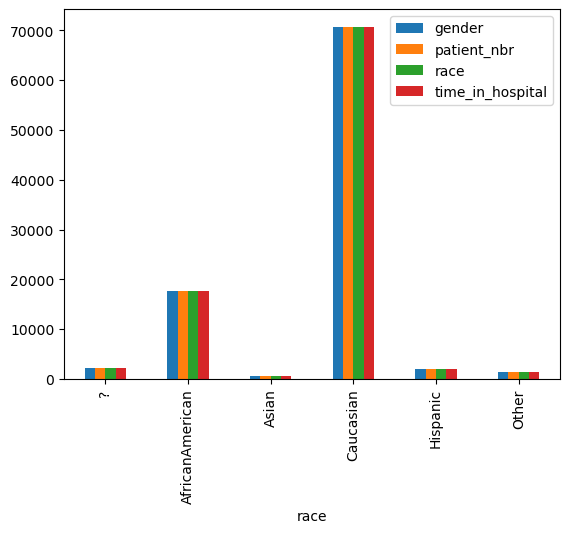

In [19]:
GroupedData=df2.groupby(df['race']).count().plot(kind='bar')
# i encountered an error here it took me a while to figure out why  all the different catagories were being grouped together on the bar chart. I used "groupeddata" to  place all of my analyzed data in itown object instead of going through them induvidually


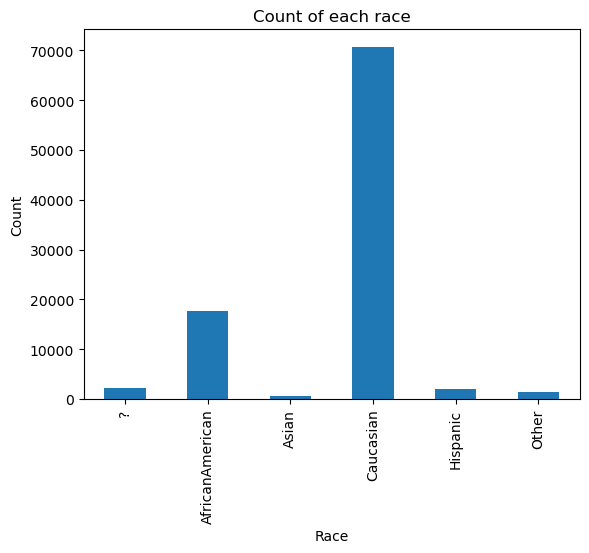

In [21]:
# after going thtough some troubshooting methods chat gpt showed me that instad of using the basic visualization functions in pandas i should try matplotlib instad
grouped_data = df2.groupby('race').size()

# Plotting the grouped data
grouped_data.plot(kind='bar')
plt.title('Count of each race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

The more revealing indicator would be race/ethnicity as shoen by the graph above. This graph shows that diabetes patients classified  according to race shows a more spread out visualization showing variance within the test subjects within the dataset. The graph itself shows that the majority of the diabetes patients are Caucasian/White but this could easily be due to the datast testing significantly more White patients than any other racial group, for ecample the second most group with diabetes casesis African Americans with 20,000 patients within the dataset.

In [ ]:
grouped_data = df.groupby('race').size()

# Plotting the grouped data
grouped_data.plot(kind='bar')
plt.title('Count of each race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

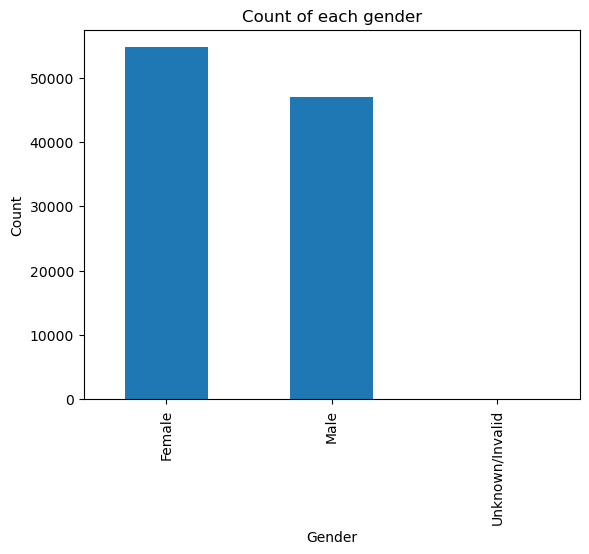

In [22]:
# Assuming df is your DataFrame with a 'gender' column
grouped_data_gender = df.groupby('gender').size()

# Plotting the grouped data for gender
grouped_data_gender.plot(kind='bar')
plt.title('Count of each gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Analysis: from the graphs shown above  there doesnt seem to be that much of a difference in the gender of diabetes patients and the length of their stays in the hospital, with only about a 4000 difference between men and women.

In [23]:
import seaborn as sns 

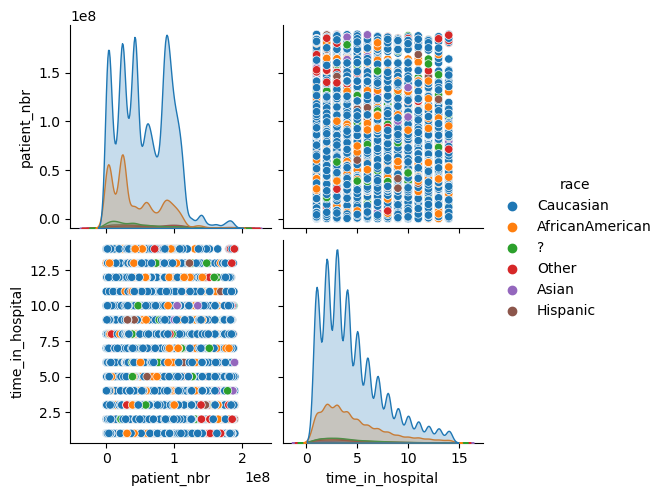

In [25]:
sns.pairplot(df2,hue='race') # after importing the seaborn  library i used the pairplot function  to  do visualization based on the indicator or columns i used for my subset dataframe placed on the different axes of the graphs 

In [26]:
# Assuming df is your DataFrame
df2.replace('?', pd.NA, inplace=True)  # Replace '?' with NaN

# Drop rows with NaN values
df2.dropna(inplace=True)


C:\Users\babra\AppData\Local\Temp\ipykernel_14124\2599840708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace('?', pd.NA, inplace=True)  # Replace '?' with NaN
C:\Users\babra\AppData\Local\Temp\ipykernel_14124\2599840708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


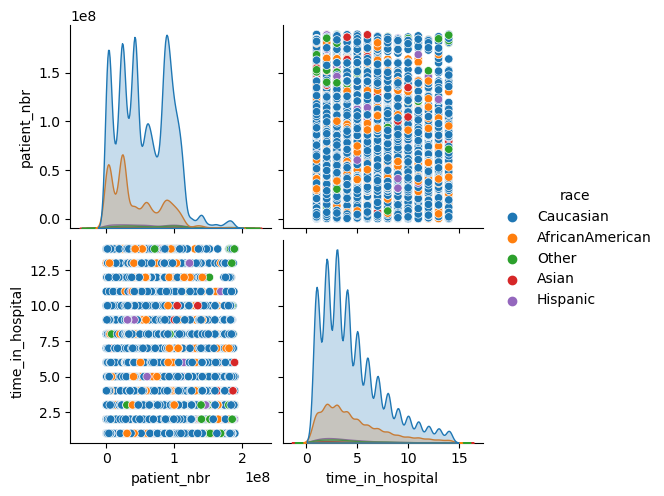

In [27]:
sns.pairplot(df2,hue='race') # after importing the seaborn 

Summary Analysis: I wanted to find an easier way to address my reasearch question of race and gender and  how it relates to duration of hospital stay without coding everything induvidually so i decided to use Seaborn. After doing so i found out that the majority of white  diabetes patients stayed in the hospital between 5 to 7 days and and as shown by the line grapgh the next most prolific group  of african american patients stayed in the hospital at a maximum of 2.5 days or less 

After todays class, i think i mightve overestimated the capabilities of the Seaborn library. I thought the X axes in the pairplot were just taking in to account the patient number values, istead the x axes is seaborn adding up the patient number values  so it really didnt  allow me to analyze the data the way i wanted to. i'll review some more documentation on matplotlib and resubmitting later